In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/raw_content.zip
/kaggle/input/stumbleupon/sampleSubmission.csv


Data Analysis.

In [3]:
import numpy as np
import pandas as pd

In [4]:
!ls

__notebook_source__.ipynb


In [17]:
raw_df = pd.read_csv("../input/stumbleupon/train.tsv",sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']

In [18]:
df.sample(5).T

,1337,1210,282,664,5886
url,http://www.todaysvideolist.com/video/QOqqIGPAK...,http://www.marthastewart.com/recipe/mario-bata...,http://www.ivillage.com/easy-meals-end-hectic-...,http://www.80spurple.com/shop/category/23/tees,http://hailmaryjane.com/category/babes/
boilerplate,"{""title"":""Today s Video List Epic Frisbee Tric...","{""title"":""Pizza Dough Martha Stewart Recipes ""...","{""title"":""10 Healthy Meals You Can Make in Und...","{""title"":""Tees Women tee clothing at 80s Purpl...","{""title"":""Babes Hail Mary Jane "",""body"":""I nee..."
alchemy_category,sports,?,?,sports,recreation
alchemy_category_score,0.639547,?,?,0.496143,0.847269
avglinksize,3.28125,1.86029,2.23478,0.75,4.52518
commonlinkratio_1,0.342857,0.552632,0.763533,0.0946746,0.629508
commonlinkratio_2,0.171429,0.171053,0.384615,0.0118343,0.334426
commonlinkratio_3,0.0571429,0.0328947,0.0797721,0,0.163934
commonlinkratio_4,0.0571429,0.0131579,0.025641,0,0.0885246
compression_ratio,0.492997,0.521136,0.485684,1.4,0.672634


In [19]:
df.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [20]:
df.label.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    1
9    1
Name: label, dtype: int64

In [21]:
df.label.mean()

0.5133198106828939

In [22]:
label_mean_by_category= df.groupby('alchemy_category').label.mean().sort_values()

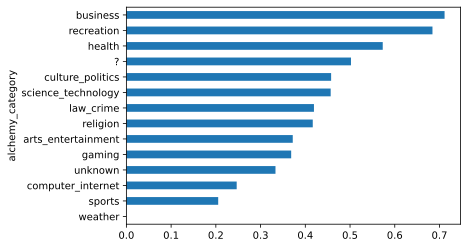

In [12]:
label_mean_by_category.plot.barh()

In [23]:
df.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,-0.133370,-0.050357,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,-0.136561,-0.038071,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,0.106335,-0.188976,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,-0.090938,0.183808,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,0.384937,-0.088847,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,0.010193,1.000000,0.009665,-0.003890,0.008579,0.022583,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863
html_ratio,0.018974,-0.201501,-0.159702,-0.133370,-0.136561,0.106335,-0.090938,0.384937,0.009665,1.000000,-0.172924,-0.215809,-0.141363,-0.136550,-0.455636,-0.042001,-0.183350,0.013860,-0.051149


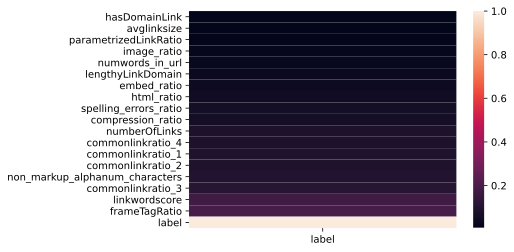

In [26]:
import seaborn as sns
sns.heatmap(df.corr().abs()[['label']].sort_values('label'))

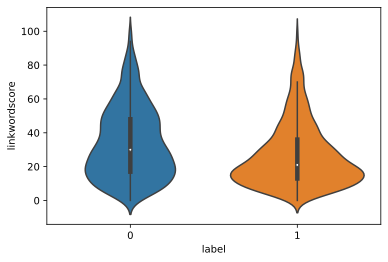

In [37]:
sns.violinplot(x='label',y='linkwordscore',data=df)

In [39]:
features_df = df.drop('label', axis=1)#delete the target feature
num_features = features_df.select_dtypes(np.number)

In [40]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [44]:
num_features.hasDomainLink.value_counts()

0    7238
1     157
Name: hasDomainLink, dtype: int64

In [ ]:
num_features.describe()